$$ 
\Large \underline{\textbf{Problema 7}}
$$

La fuerza efectiva que realiza el viento sobre el mástil de un bote de velas puede aproximarse por la siguiente
expresión:

$$ \large
\begin{equation}
F=\int \limits_{0}^{30}200\frac{z}{5+z}e^{-2\ z\ /\ 30}dz
\end{equation}
$$

donde F está dada en lbs y las distancias en pies. Estime, utilizando los métodos de trapecios, de Simpson 1/3
y cuadraturas de Gauss, cuánto vale la fuerza total y dónde será el punto de acción efectiva de esta fuerza

$$ \large
\begin{equation}
d=\int \limits_{0}^{30}z\ f(z)\ dz
\end{equation}
$$

Utilice varios tamaños de paso de integración, entre 5 y 0.05 pies, y estudie la convergencia de cada método.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 0
b = 30
p = 200  # pasos de integración

$ \large \textbf
{Método de Trapecios}
$

In [12]:
def trapecios(p, a=0, b=30):
    x = np.linspace(a, b, p)
    sum = []
    f = 0
    for i, xi in enumerate(x[1:-1]):
        f += 200*xi/(5+xi)*np.exp(-2*xi/30)
        sum.append(f)
    fo = 200*a/(5+a)*np.exp(-2*a/30)
    fn = 200*b/(5+b)*np.exp(-2*b/30)
    IL = (b-a)/p*1/2*(fo+2*sum[-1]+fn)
    return IL

In [36]:
nint = np.logspace(1, 5, 20).astype(int)

In [37]:
nint

array([    10,     16,     26,     42,     69,    112,    183,    297,
          483,    784,   1274,   2069,   3359,   5455,   8858,  14384,
        23357,  37926,  61584, 100000])

In [38]:
IL = [trapecios(p) for p in nint]

In [39]:
e = np.abs((IL[:-1]-IL[-1])/IL[-1])

Text(0.5, 1.0, 'Error en método de Trapecios')

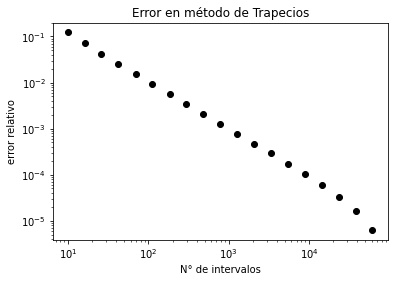

In [44]:
plt.loglog(nint[:-1], e, 'ok')
plt.xlabel('N° de intervalos')
plt.ylabel('error relativo')
plt.title('Error en método de Trapecios')

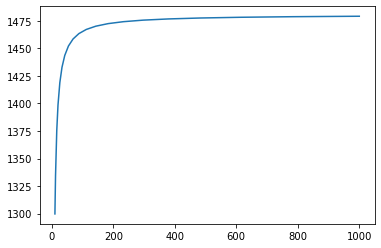

In [32]:
plt.plot(nint, IL)

$ \large \textbf
{Método de Simpsons 1/3}
$

In [4]:
x = np.linspace(a, b, p)
sum = []
fpar = 0
fimp = 0
for i, xi in enumerate(x[1:-1]):
    if i % 2 == 0:
        fpar += 200*xi/(5+xi)*np.exp(-2*xi/30)
        sum.append(fpar)
    elif i % 2 == 1:
        fimp += 200*xi/(5+xi)*np.exp(-2*xi/30)
fo = 200*a/(5+a)*np.exp(-2*a/30)
fn = 200*b/(5+b)*np.exp(-2*b/30)
IL = (b-a)/(p-1)*1/3*(fo+4*fpar+2*fimp+fn)

print(IL)

1479.3971559251793


$ \large \textbf
{Método de Gauss}
$

In [11]:
c = [1, 1]
t = [-1/(3**(1/2)), 1/(3**(1/2))]
xt = []  # x en función de t
sum = 0
for i, ti in enumerate(t):
    xt.append((b-a)/2*ti+(b+a)/2)
    sum += c[i]*200*xt[i]/(5+xt[i])*np.exp(-2*xt[i]/30)
IG = (b-a)/2*sum
print(IG)

1610.5722652945797


In [ ]:
for i in range(0,100,10):